Lexical Complexity / Diversity vs. Character Error Rate

In [1]:
# Imports
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [11]:
# Read CSV
df = pd.read_csv(r"C:\Users\larak\Downloads\readable_v2.csv")

In [12]:
# CER
X = df['CER']
X_const = sm.add_constant(X)  # add constant term

In [13]:
# For lexical complexity
Y_fk_ocr = df['fk_ocr']  # Flesch-Kincaid score from OCR data

# Bivariate regression for Flesch-Kincaid score vs CER
model_fk = sm.OLS(Y_fk_ocr, X_const).fit()

print("Regression Summary for Flesch-Kincard Score vs. CER:")
print(model_fk.summary())


Regression Summary for Flesch-Kincard Score vs. CER:
                            OLS Regression Results                            
Dep. Variable:                 fk_ocr   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     6.380
Date:                Fri, 01 Mar 2024   Prob (F-statistic):             0.0124
Time:                        12:48:51   Log-Likelihood:                -599.68
No. Observations:                 187   AIC:                             1203.
Df Residuals:                     185   BIC:                             1210.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

In [14]:
# For lexical complexity
Y_flesch_ocr = df['flesch_ocr']  # Flesch score from OCR data

# Bivariate regression for Flesch score vs CER
model_flesch = sm.OLS(Y_flesch_ocr, X_const).fit()

print("Regression Summary for Flesch Score vs. CER:")
print(model_flesch.summary())


Regression Summary for Flesch Score vs. CER:
                            OLS Regression Results                            
Dep. Variable:             flesch_ocr   R-squared:                       0.260
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     65.11
Date:                Fri, 01 Mar 2024   Prob (F-statistic):           8.71e-14
Time:                        12:49:06   Log-Likelihood:                -802.18
No. Observations:                 187   AIC:                             1608.
Df Residuals:                     185   BIC:                             1615.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const  

In [15]:
# For lexical diversity
Y_lexical_diversity_ocr = df['lex_ocr']  # Lexical diversity from OCR data, using LexicalRichness package

# Bivariate regression for lexical diversity vs CER
model_lex = sm.OLS(Y_lexical_diversity_ocr, X_const).fit()

print("Regression Summary for Lexical Diversity vs. CER:")
print(model_lex.summary())

Regression Summary for Lexical Diversity vs. CER:
                            OLS Regression Results                            
Dep. Variable:                lex_ocr   R-squared:                       0.270
Model:                            OLS   Adj. R-squared:                  0.266
Method:                 Least Squares   F-statistic:                     68.37
Date:                Fri, 01 Mar 2024   Prob (F-statistic):           2.59e-14
Time:                        12:49:13   Log-Likelihood:                 196.66
No. Observations:                 187   AIC:                            -389.3
Df Residuals:                     185   BIC:                            -382.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
co

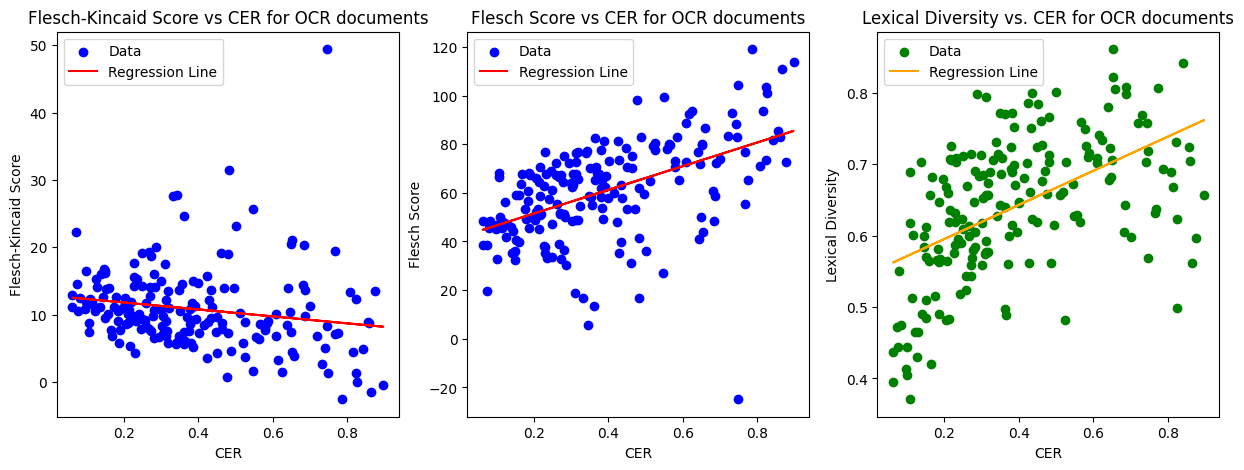

In [16]:
# Plot the regression lines
plt.figure(figsize=(15, 5))

# Plotting Lexical Complexity (Flesch-Kincaid) vs CER
plt.subplot(1, 3, 1)
plt.scatter(X, Y_fk_ocr, color='blue', label='Data')
plt.plot(X, model_fk.predict(X_const), color='red', label='Regression Line')
plt.xlabel('CER')
plt.ylabel('Flesch-Kincaid Score')
plt.title('Flesch-Kincaid Score vs CER for OCR documents')
plt.legend()

# Plotting Lexical Complexity (Flesch Score) vs CER
plt.subplot(1, 3, 2)
plt.scatter(X, Y_flesch_ocr, color='blue', label='Data')
plt.plot(X, model_flesch.predict(X_const), color='red', label='Regression Line')
plt.xlabel('CER')
plt.ylabel('Flesch Score')
plt.title('Flesch Score vs CER for OCR documents')
plt.legend()

# Plotting Lexical Diversity (OCR) vs CER
plt.subplot(1, 3, 3)
plt.scatter(X, Y_lexical_diversity_ocr, color='green', label='Data')
plt.plot(X, model_lex.predict(X_const), color='orange', label='Regression Line')
plt.xlabel('CER')
plt.ylabel('Lexical Diversity')
plt.title('Lexical Diversity vs. CER for OCR documents')
plt.legend()